In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score


In [39]:
df = pd.read_csv('ifood_df.csv')

In [40]:
print("First 5 rows of the data :")
print(df.head)

First 5 rows of the data :
<bound method NDFrame.head of        Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0     58138.0        0         0       58       635         88   
1     46344.0        1         1       38        11          1   
2     71613.0        0         0       26       426         49   
3     26646.0        1         0       26        11          4   
4     58293.0        1         0       94       173         43   
...       ...      ...       ...      ...       ...        ...   
2200  61223.0        0         1       46       709         43   
2201  64014.0        2         1       56       406          0   
2202  56981.0        0         0       91       908         48   
2203  69245.0        0         1        8       428         30   
2204  52869.0        1         1       40        84          3   

      MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  ...  \
0                 546              172                88            88 

In [41]:
print("Information about the data :")
print(df.info)

Information about the data :
<bound method DataFrame.info of        Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0     58138.0        0         0       58       635         88   
1     46344.0        1         1       38        11          1   
2     71613.0        0         0       26       426         49   
3     26646.0        1         0       26        11          4   
4     58293.0        1         0       94       173         43   
...       ...      ...       ...      ...       ...        ...   
2200  61223.0        0         1       46       709         43   
2201  64014.0        2         1       56       406          0   
2202  56981.0        0         0       91       908         48   
2203  69245.0        0         1        8       428         30   
2204  52869.0        1         1       40        84          3   

      MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  ...  \
0                 546              172                88           

In [42]:

df = df.dropna()


In [43]:
df.isnull().sum()


Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
AcceptedCmpO

In [44]:
df.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall'],
      dtype='object')

In [45]:
df.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,...,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000
mean,51622.094785,0.442177,0.506576,49.009070,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,...,0.257596,0.034467,0.089796,0.024490,0.504762,0.165079,0.215873,562.764626,518.707483,0.29932
std,20713.063826,0.537132,0.544380,28.932111,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,...,0.437410,0.182467,0.285954,0.154599,0.500091,0.371336,0.411520,575.936911,553.847248,0.68044
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.00000
25%,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,42.000000,0.00000
50%,51287.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,343.000000,288.000000,0.00000
75%,68281.000000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,964.000000,884.000000,0.00000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2491.000000,2458.000000,4.00000


Filtering only purchase-related columns

In [46]:
purchase_columns = [
    'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
    'MntSweetProducts', 'MntGoldProds',
    'NumDealsPurchases', 'NumWebPurchases',
    'NumCatalogPurchases', 'NumStorePurchases'
]

In [47]:
df = df[purchase_columns].dropna()

Calculating total money spent and total purchase frequency

In [48]:
df['TotalPurchaseAmount'] = df[
    ['MntWines', 'MntFruits', 'MntMeatProducts',
     'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
].sum(axis=1)

In [49]:
df['TotalPurchaseFrequency'] = df[
    ['NumDealsPurchases', 'NumWebPurchases',
     'NumCatalogPurchases', 'NumStorePurchases']
].sum(axis=1)

In [50]:
df_clean = df[df['TotalPurchaseFrequency'] > 0].copy()

Calculating Average purchase value

In [51]:
df_clean['AveragePurchaseValue'] = df_clean['TotalPurchaseAmount'] / df_clean['TotalPurchaseFrequency']

In [52]:
print(df_clean[['TotalPurchaseAmount', 'TotalPurchaseFrequency', 'AveragePurchaseValue']].describe())

       TotalPurchaseAmount  TotalPurchaseFrequency  AveragePurchaseValue
count          2203.000000             2203.000000           2203.000000
mean            607.367680               14.901498             32.620512
std             601.675357                7.605499             28.552507
min               8.000000                1.000000              0.533333
25%              69.000000                8.000000              9.714286
50%             397.000000               15.000000             23.384615
75%            1047.500000               21.000000             45.360577
max            2525.000000               43.000000            186.500000


In [53]:
X = df_clean[['TotalPurchaseAmount', 'TotalPurchaseFrequency', 'AveragePurchaseValue']]


In [54]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [55]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

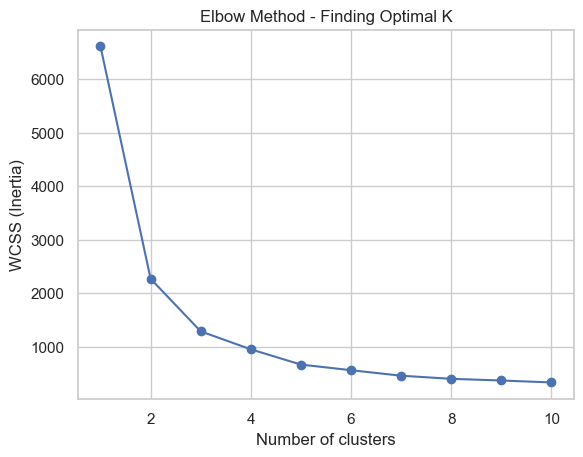

In [56]:
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method - Finding Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS (Inertia)')
plt.grid(True)
plt.show()

Now Applying K-Means clusturinng in the chosen 4 clusters

In [57]:
kmeans = KMeans(n_clusters=4, random_state=42)
df_clean['Cluster'] = kmeans.fit_predict(X_scaled)

labels = df_clean['Cluster']

sil_score = silhouette_score(X_scaled, labels)
db_index = davies_bouldin_score(X_scaled, labels)
ch_score = calinski_harabasz_score(X_scaled, labels)

print(f"Silhouette Score: {sil_score:.4f}")
print(f"Davies-Bouldin Index: {db_index:.4f}")
print(f"Calinski-Harabasz Index: {ch_score:.4f}")

Silhouette Score: 0.5349
Davies-Bouldin Index: 0.7515
Calinski-Harabasz Index: 4373.4823


SCATTERPLOT

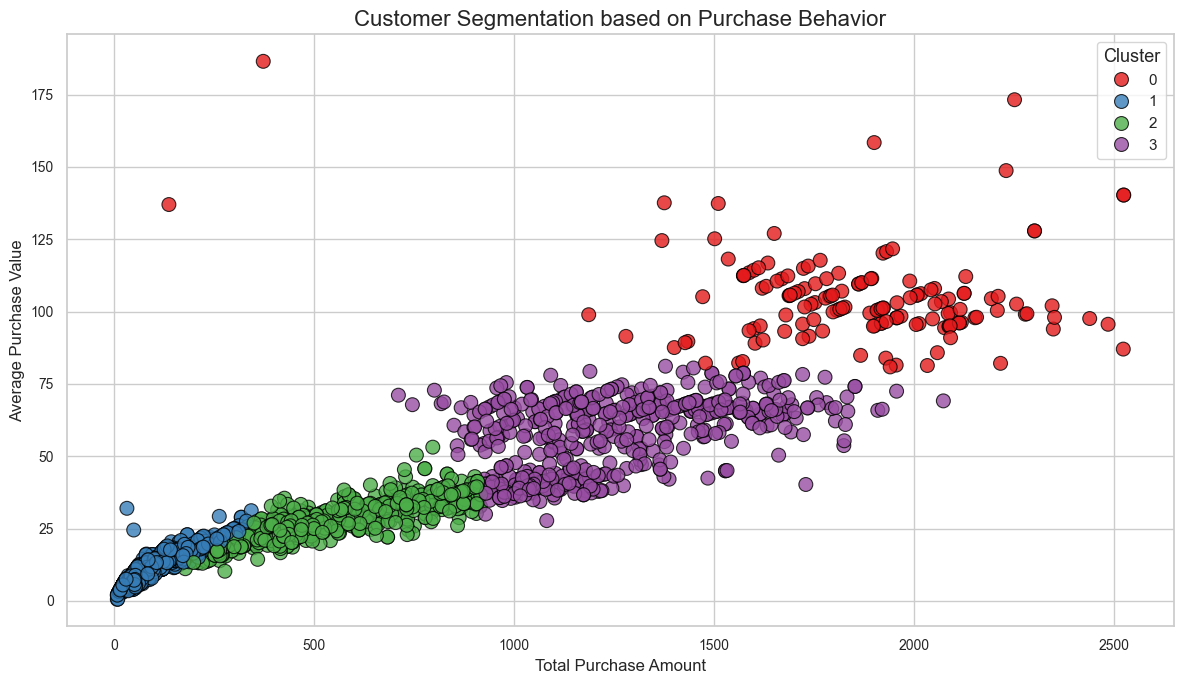

In [58]:
sns.set(style='whitegrid')

plt.figure(figsize=(12, 7))
scatter = sns.scatterplot(
    x='TotalPurchaseAmount',
    y='AveragePurchaseValue',
    hue='Cluster',
    palette='Set1',
    data=df_clean,
    s=100,  
    alpha=0.8,
    edgecolor='black'
)

plt.title('Customer Segmentation based on Purchase Behavior', fontsize=16)
plt.xlabel('Total Purchase Amount', fontsize=12)
plt.ylabel('Average Purchase Value', fontsize=12)
plt.legend(title='Cluster', title_fontsize='13', fontsize='11')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

BAR CHART VISUALIZATION 

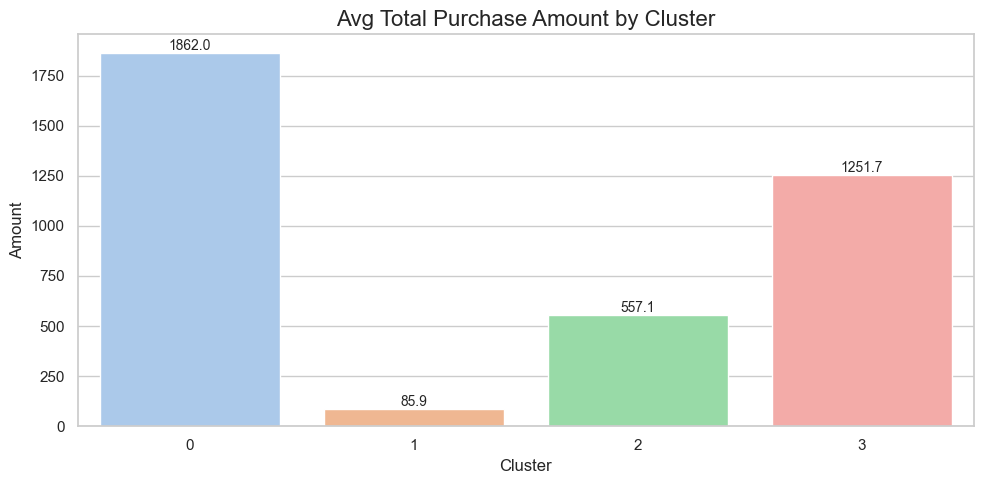

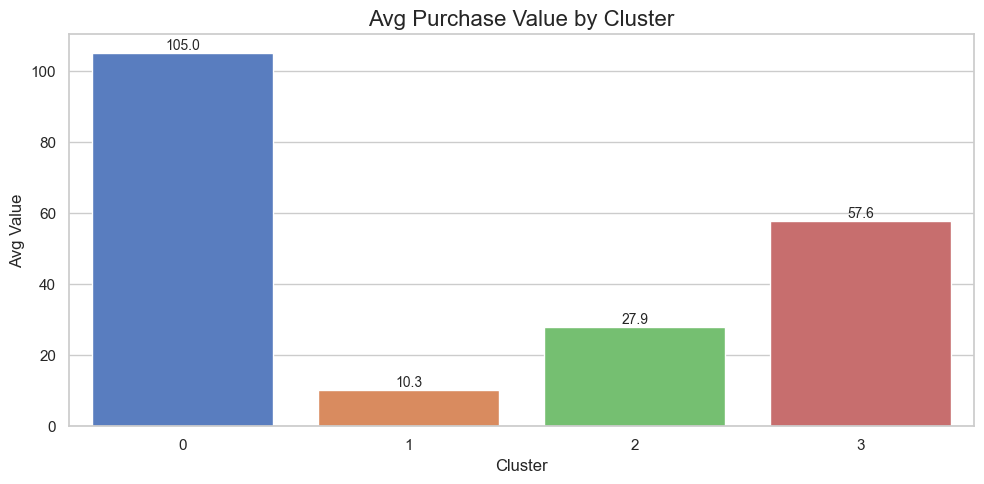

In [59]:
sns.set(style='whitegrid')
cluster_summary = df_clean.groupby('Cluster')[['TotalPurchaseAmount', 'AveragePurchaseValue']].mean().reset_index()

plt.figure(figsize=(10, 5))
bar1 = sns.barplot(data=cluster_summary, x='Cluster', y='TotalPurchaseAmount', hue='Cluster', palette='pastel', legend=False)
plt.title('Avg Total Purchase Amount by Cluster', fontsize=16)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Amount', fontsize=12)
for p in bar1.patches:
    bar1.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2, p.get_height()), 
                  ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
bar2 = sns.barplot(data=cluster_summary, x='Cluster', y='AveragePurchaseValue', hue='Cluster', palette='muted', legend=False)
plt.title('Avg Purchase Value by Cluster', fontsize=16)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Avg Value', fontsize=12)
for p in bar2.patches:
    bar2.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2, p.get_height()), 
                  ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()

SUMMARY

In [60]:
segment_summary = df_clean.groupby('Cluster')[['TotalPurchaseAmount', 'AveragePurchaseValue']].mean().reset_index()

def describe_segment(row):
    if row['TotalPurchaseAmount'] > df_clean['TotalPurchaseAmount'].quantile(0.75):
        return 'Premium Customer'
    elif row['TotalPurchaseAmount'] < df_clean['TotalPurchaseAmount'].quantile(0.25):
        return 'Low-Value/Inactive Customer'
    else:
        return 'Regular Customer'

segment_summary['Segment Description'] = segment_summary.apply(describe_segment, axis=1)

print("Customer Segment Summary:\n")
print(segment_summary)

Customer Segment Summary:

   Cluster  TotalPurchaseAmount  AveragePurchaseValue Segment Description
0        0          1861.966667            105.045625    Premium Customer
1        1            85.913313             10.262117    Regular Customer
2        2           557.074681             27.911096    Regular Customer
3        3          1251.685981             57.642917    Premium Customer
